# Tweaking plots

In this section we cover some points about adjusting the appearance of plots:

* setting axis labels
* setting plot titles
* adding and editing a legend
* arranging suplots to make a multi-panel figure
* adjusting the size and shape of figures within your Jupyter notebook

Whilst `Seaborn` does often get things right by default, all of the above 'tweaks' can be essential to produce a meaningful figure that is easy for the reader to interpret.

## `Matplotlib`

`Seaborn` is designed to produce nice looking plots without us having to manually set many options. `Seaborn` is built from components of an older plotting library called `Matplotlib` (which is based on the plotting functions of MATLAB, another scientific programming environment). `Matplotlib ` contains a lot of lower level plotting functions (things that produce or edit bits of plots, rather than producing a whole nice figure in one step). 

If we want to manually set something like the axis labels or axis range, we may need to go back and call functions from `Matplotlib` directly. 

In the olden days, people made plots just with `Matplotlib` and had to write a lot more code to achieve a nice looking plot.

* `Matplotlib` functions are preceded by `plt.` for example `plt.xlim()` or `plt.subplot()`
* In contrast, `Seaborn` functions aare preceded by `sns.` (Samuel Norman Seaborn!), e.g. `sns.histplot()`.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import the data

We'll use the Titanic data (data on 890 people who were onbboard the Titanic when it sank). This includes some odd sounding variables such as <tt>SibSp</tt> but don't worry about them for now.

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/titanic_2.csv')
display(titanic)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As an initial exercise, let's plot a histogram of the age of the passengers:

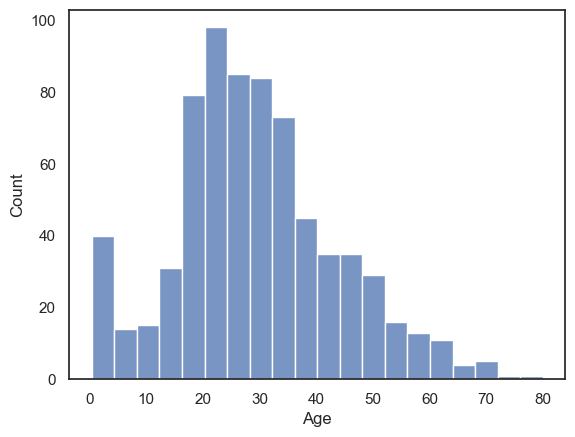

In [3]:
sns.histplot(data=titanic, x='Age')
plt.show()

We can see that there were a lot of young adults on the Titanic - possibly emigrating to start a new life in America.

## Axis Labels & Title

- `plt.xlabel()`
- `plt.ylabel()`
- `plt.title()`

Your axis labels should always convey what is plotted. If you are using `Seaborn` with a `Pandas` dataframe, the axis labels will often be the column labels from your dataframe, which are (usually) meaningful although sometimes they are odd codes that wouldn't mean much to a naive reader (The titanic dataset is a culprit here - what is <tt>Pclass</tt>? <tt>SibSp</tt>? <tt>Parch</tt>?!).

You can always edit the labels on the axes and unless their meaning is clear, **you must do so**.
    
You may also wish to give your plot a title.

Just for fun let's label the x axis "bananas" and the y axis "fruitbats", and the title "A load of nonsense":

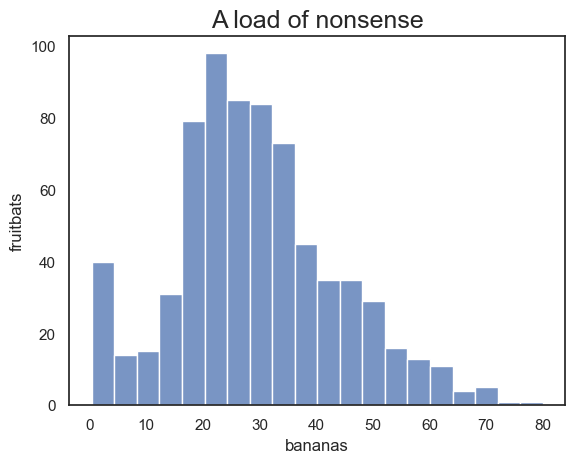

In [4]:
sns.histplot(data=titanic, x='Age')
plt.xlabel('bananas')
plt.ylabel('fruitbats')
plt.title('A load of nonsense', fontsize=18) # note I maade the writing bigger!
plt.show()

## Legend

- plt.legend()

Say we plot the age of people in the different classes on the Titanic separately for each class. I've used a KDE plot here rather than a histogram, as the histogram is just a bit too cluttered with the three distributions (you can try changing it to a histogram to see what I mean).

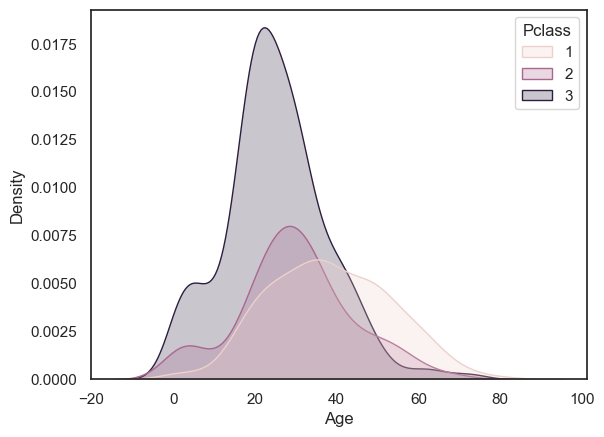

In [5]:
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.show()

* **Note** a lot of those young adults were in 3rd class, and there were almost no children in first class

In the plot above, we automatically get a legend labelling the three plots with the corresponding values of the `hue` variable. However, you may wish to control the title and labels in the figure legend, as follows:

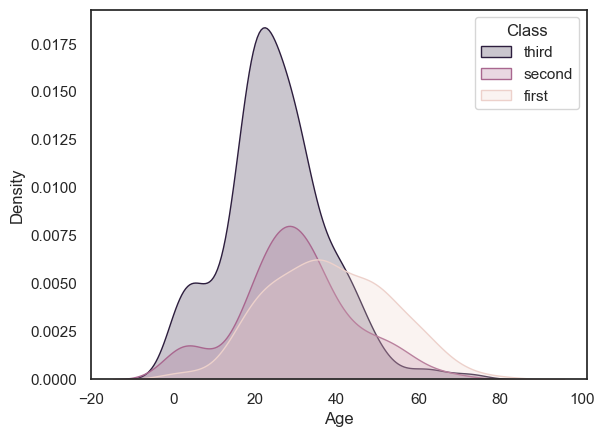

In [6]:
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.legend(['third', 'second','first'], title='Class')
plt.show()

## Ordering

When plotting categorical data in which the categories aare defined by strings, `Seaborn` tends to plot the data categories in the order in which they occur in the dataframe, when reading fromm top to bottom.

Sometimes this is not the order we would prefer - consider the following example using the Oxford weather dataset:

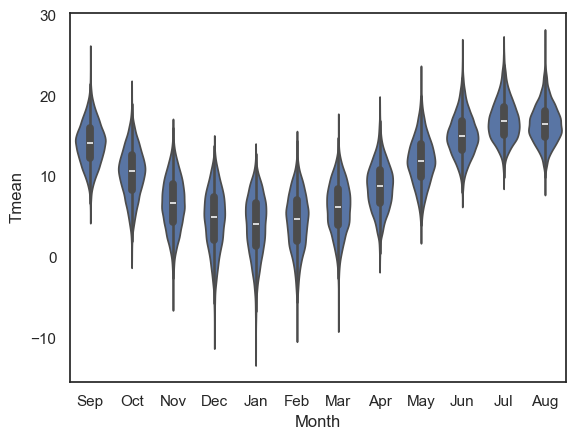

In [7]:
weather = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/OxfordWeather2.csv')
sns.violinplot(data=weather, x='Month', y='Tmean')
plt.show()

Well, the year doesn't start in September, although the dataset does, so we might prefer to change the order.

We can force the order in which the categories are presented useing the argument `order`

* **Note** this would become `hue_order` if we were using the `hue` property to disaggregate categories of data in a KDE plot or histogram.

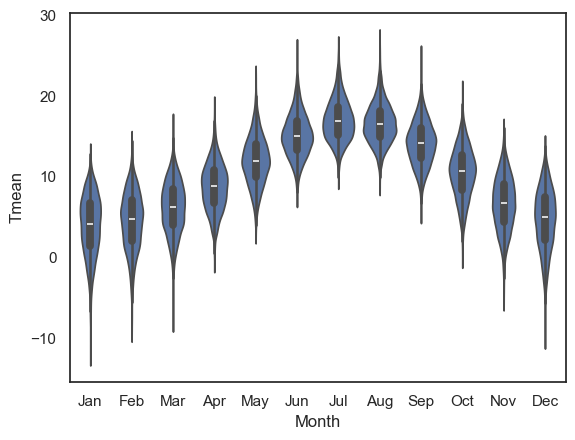

In [8]:
sns.violinplot(data=weather, x='Month', y='Tmean', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

## Subplots

Often we wish to present a couple of different plots to make a point. 

Returning to the Titanic dataset, say we want to plot a histogram of age separately for men and women.

We might like to show these plots next to each other as panels of a larger figure

This is achieved using the function `plt.subplot()` which creates a figure with multiple panels or subplots.

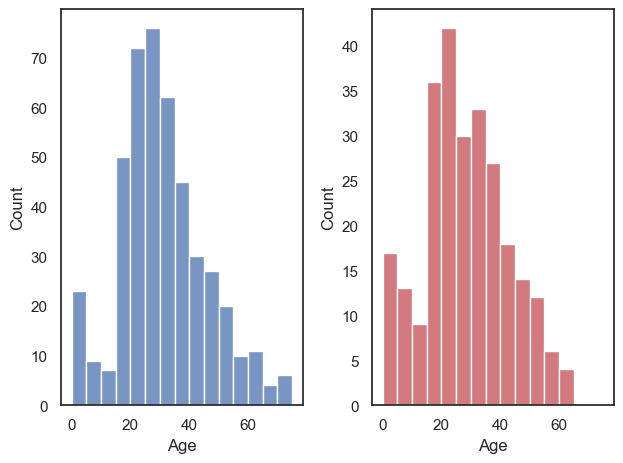

In [9]:
plt.subplot(1,2,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(1,2,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()

The arguments of `plt.subplot()` are the number of rows and columns to be created in the figure, and then the location in which to place the next plot.

In the example above we have one row and two columns; if we wanted two rows and one column, we would do this:

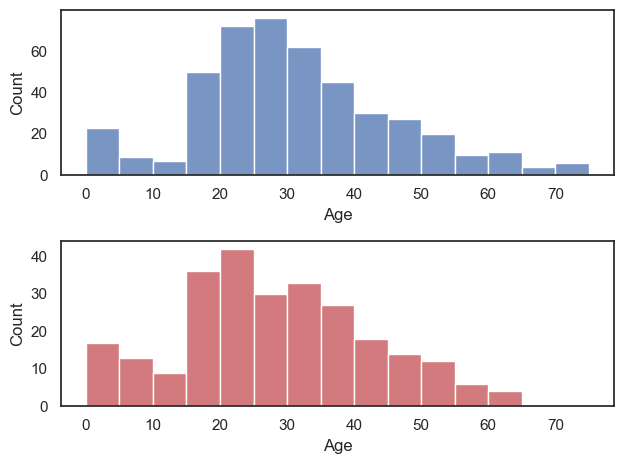

In [10]:
plt.subplot(2,1,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(2,1,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots so they don't overlap
plt.show()

Ah, it's actually a bit easier to compare the distributions when they are arranged vertically - for example we can see that the maximum age for women was higher, and the peak age for women was (slightly) lower. Good choice!

### plt.subplot() syntax

The function plt.subplot() has three arguments:
* plt.subplot(rows, columns, place)

For example, if we want to create a figure with one row and two columns (plots side-by-side), we use <tt>plt.subplot(1,2,x)</tt>, where <tt>x</tt> is the location to put the next plot, reading from left to right and top to bottom. This is perhaps best explained by diagram.

Here is how I make a subplot with 3 rows and 2 columns. The red numbers are the place indicators.    
    
<img src="../images/MT_wk2_subplot32i.png" width="60%"/>

Here is how I make a subplot with 2 rows and 4 columns. The red numbers are the place indicators.
    
<img src="../images/MT_wk2_subplot24i.png" width="100%" />


### plt.tight_layout()

Sometimes the axis label of one subplot impinges on the adjecent subplot.

The command plt.tight_layout() usually fixes this.


## Axis range

- `plt.xlim()`
- `plt.ylim()`

It is often easier to compare across plots if the axis ranges are the same. 

Seaborn will automatically adjust the axes to fit the range of the data in each plot, which normally means the axis ranges don't match across subplots.

We can set the axis range using the functions `plt.ylim()` (to set the limits in $y$) and `plt.xlim()` (to set the limits in $x$)

Let's remake our two side-by-side subbplots of age of men and women, and this time set the y axis to have the same range

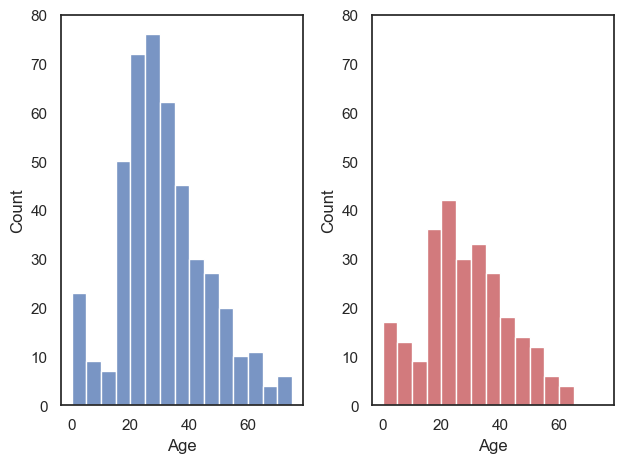

In [11]:
plt.subplot(1,2,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))
plt.ylim([0,80])

plt.subplot(1,2,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))
plt.ylim([0,80])

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()

Ooh, suddenly we can see that there were a lot more men than women on the Titanic!

* **Note** It is generally most relevant to match the $y$-axes when two subplots are side-by-side, and the $x$-axes when the subplots are arranged one above the other. However, it is often (but not always) best to match both $x$ and $y$ axes.

## Figure size

`plt.figure(figsize=(x,y))`

Maybe the figures in your Jupyter notebook are too big or too small for your liking, or have the wrong aspect ratio.

You can change this be 'pre-creating' your figure at a certain size using `plt.figure(figsize=(x,y))`, before running the plotting command (eg `sns.kdeplot()`).

<tt>x</tt> and <tt>y</tt> are the desired size, nominally in inches, but this will depend on the size of your screen (!):

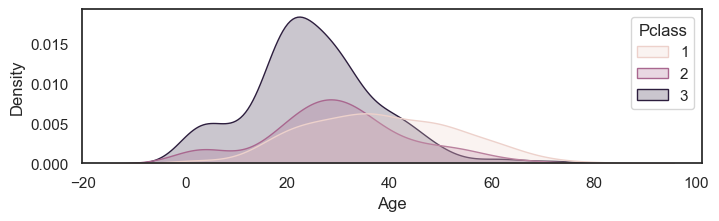

In [12]:
# create a low, wide figure
plt.figure(figsize=(8,2))
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.show()

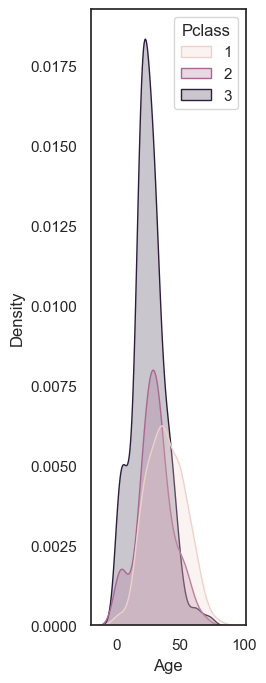

In [13]:
# create a tall thin figure
plt.figure(figsize=(2,8))
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.show()

Note that this applies to the whole figure, which could be made up from several subplots - so this syntax can be useful to avoid your subplots getting very stretched - compare the default aspect ratio here:


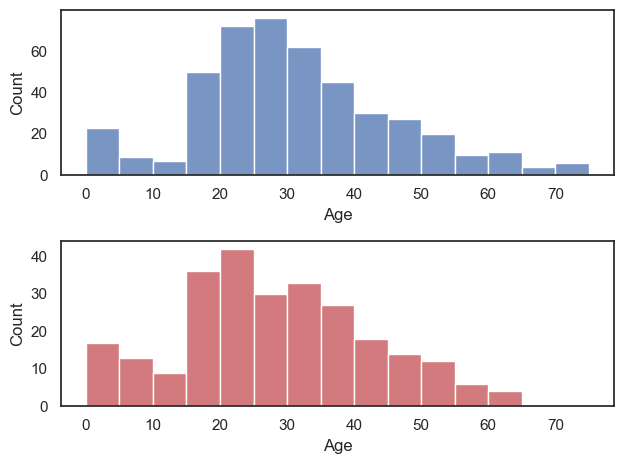

In [14]:
plt.subplot(2,1,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(2,1,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()

... with a tweaked one here:

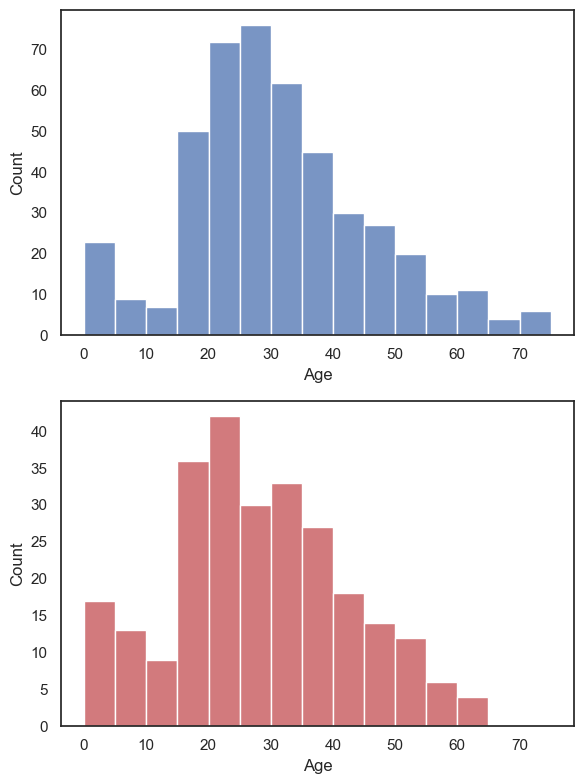

In [15]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(2,1,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()